In [19]:
#  I use data set from https://www.kaggle.com/datasets/denisadutca/customer-behaviour/code soure free.
# import Moduel 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# read .CSV file
raw_df = pd.read_csv("Customer_Behaviour.csv")
raw_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
# cheak missing value and clean data, shape
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
raw_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
raw_df.shape

(400, 5)

# Categorical Data

In [29]:
# create dummy  if male=1, female = 0
raw_df["gender"] = pd.get_dummies(raw_df["Gender"])["Male"]

In [30]:
raw_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,gender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


# drop unuse column

In [32]:
raw_df.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [33]:
raw_df

,Age,EstimatedSalary,Purchased,gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


# View Data to Analytical

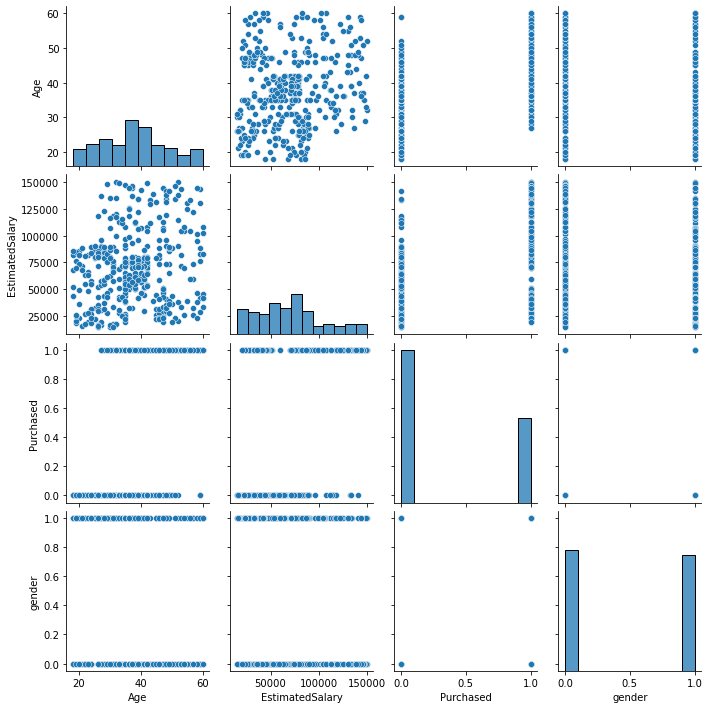

In [40]:
sns.pairplot(raw_df)

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

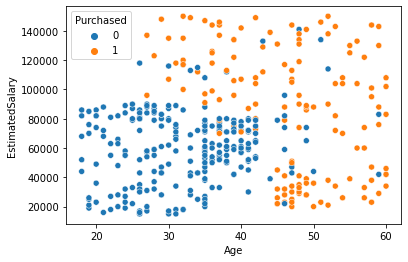

In [35]:
sns.scatterplot(raw_df["Age"], raw_df["EstimatedSalary"], hue=raw_df["Purchased"])

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='EstimatedSalary'>

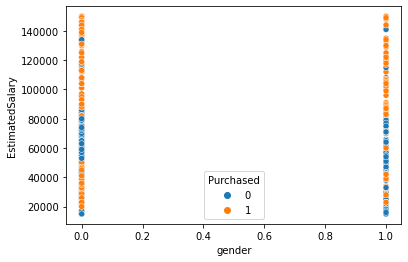

In [48]:
sns.scatterplot(raw_df["gender"], raw_df["EstimatedSalary"], hue=raw_df["Purchased"])
# find no matter gender if they have high salary they have trend to purchase than low salary group

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='gender'>

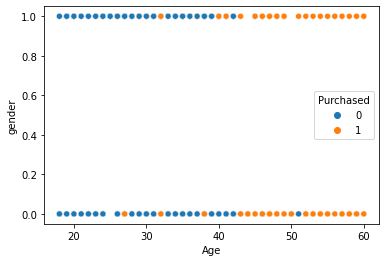

In [46]:
sns.scatterplot(raw_df["Age"], raw_df["gender"], hue=raw_df["Purchased"])
# find no matter gender if they have age over 40 year they have trend to purchase than below 40 age

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

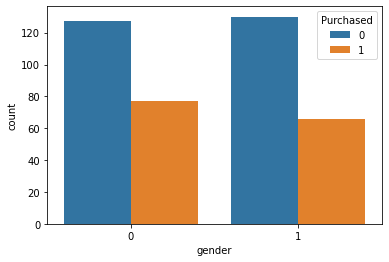

In [47]:
sns.countplot(raw_df["gender"], hue=raw_df["Purchased"])
# we find  male is purchase than female a little bit


# Splitting Training and Testing

In [81]:
# create varable to use in train&test split and test 20% train 80% and random in 64 time
X = raw_df.drop("Purchased", axis=1).values
y = raw_df["Purchased"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Preprocessing

In [82]:
# tranform dataset to scalar to feture scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating Model 

In [83]:
# create function and check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

# K-Nearest Neighbors Classifier

In [85]:
# Find K of K mean function 
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

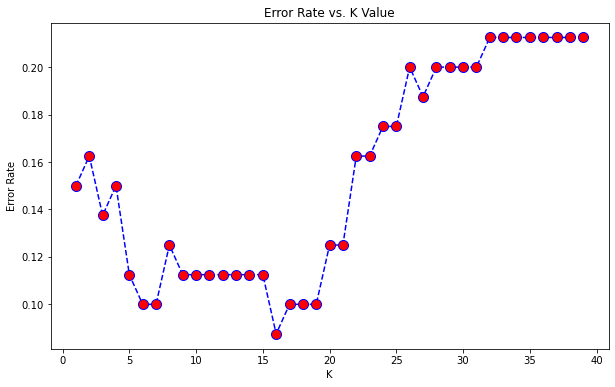

In [86]:
error_rate = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
modelKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
modelKNN.fit(X_train_scaled, y_train)
y_pred = modelKNN.predict(X_test_scaled)

evaluate_model_performance(y_test, y_pred)

0.8875
[[38  6]
 [ 3 33]]


In [88]:
# Calculate Model accuracy by comparing y_test and y_pred 
acc_knn = accuracy_score(y_test, y_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  0.8875


# Logistic Regression

In [89]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
modelLO = LogisticRegression()
modelLO.fit(X_train, y_train)
y_pred = modelLO.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.55
[[44  0]
 [36  0]]


In [90]:
acc_lo = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic regresstion: ', acc_lo )

Accuracy of Logistic regresstion:  0.55


# Random Forest Classification

In [91]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train, y_train)
y_pred = modelRFC.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.875
[[37  7]
 [ 3 33]]


In [92]:
acc_RFC = accuracy_score(y_test, y_pred)
print( 'Random Forest Classification: ', acc_RFC )

Random Forest Classification:  0.875


# Decision Tree Classification

In [93]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)
y_pred = modelDTC.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.7875
[[37  7]
 [10 26]]


In [94]:
acc_DTC = accuracy_score(y_test, y_pred)
print( 'Accuracy of Decision Tree Classification: ', acc_DTC )

Accuracy of Decision Tree Classification:  0.7875


# Prediction Conclusion

In [95]:
Models = pd.DataFrame({
    'model': ['KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier', 'RandomForestClassifier' ],
    'Score': [acc_knn, acc_lo, acc_DTC, acc_RFC]})

Models.sort_values(by='Score', ascending=False)

,model,Score
0,KNeighborsClassifier,0.8875
3,RandomForestClassifier,0.8750
2,DecisionTreeClassifier,0.7875
1,LogisticRegression,0.5500


In [96]:
# we find  KNNClassifier is the most accurate prediction. (88% accuracy) but we must test in rew data to prevent Overfitting

In [98]:
Predict_PurchaseKNN = modelKNN.predict(raw_df.drop('Purchased', axis=1))
Predict_PurchaseKNN

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [100]:
Predict_PurchaseRFC = modelRFC.predict(raw_df.drop('Purchased', axis=1))
Predict_PurchaseRFC

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [101]:
Predict_PurchaseDTC = modelDTC.predict(raw_df.drop('Purchased', axis=1))
Predict_PurchaseDTC

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,

In [103]:
Predict_PurchaseLO = modelLO.predict(raw_df.drop('Purchased', axis=1))
Predict_PurchaseLO

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
# compare with another model with real value
raw_df['DTC'] = Predict_PurchaseDTC
raw_df['RFC'] = Predict_PurchaseRFC
raw_df['KNN'] = Predict_PurchaseKNN
raw_df['LO'] = Predict_PurchaseLO
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
raw_df

,Age,EstimatedSalary,Purchased,gender,DTC,RFC,KNN,LO
0,19,19000,0,1,0,0,1,0
1,35,20000,0,1,0,0,1,0
2,26,43000,0,0,0,0,1,0
3,27,57000,0,0,0,0,1,0
4,19,76000,0,1,0,0,1,0
5,27,58000,0,1,0,0,1,0
6,27,84000,0,0,0,0,1,0
7,32,150000,1,0,1,1,1,0
8,25,33000,0,1,0,0,1,0
9,35,65000,0,0,0,0,1,0


In [106]:
x = raw_df.drop('gender', axis = 1)
x

,Age,EstimatedSalary,Purchased,DTC,RFC,KNN,LO
0,19,19000,0,0,0,1,0
1,35,20000,0,0,0,1,0
2,26,43000,0,0,0,1,0
3,27,57000,0,0,0,1,0
4,19,76000,0,0,0,1,0
5,27,58000,0,0,0,1,0
6,27,84000,0,0,0,1,0
7,32,150000,1,1,1,1,0
8,25,33000,0,0,0,1,0
9,35,65000,0,0,0,1,0


In [107]:
A = (x['Purchased'] != x['DTC']). sum()
A

18

In [108]:
B = (x['Purchased'] != x['RFC']). sum()
B

12

In [109]:
C = (x['Purchased'] != x['KNN']). sum()
C

257

In [111]:
D = (x['Purchased'] != x['LO']). sum()
C

257

In [112]:
A_ = 100-(A/400*100)
B_ = 100- (B/400*100)
C_ = 100-(C/400*100)
D_ =  100-(D/400*100)


A_, B_, C_, D_

(95.5, 97.0, 35.75, 64.25)

# conclusion

In [ ]:
# Find we should RandomForestClassifier for predict chance of customer to buy becase KNN is overfitting and another is accuracy below than RFC 